<a href="https://colab.research.google.com/github/mmushonga09-cloud/Computational-Analytics/blob/main/Script%2003%20-%20Feature%20Engineering%20-%20Guided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/Computational-Analytics.git


# changing directory
import os
repo_name = '/content/Computational-Analytics/'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'Computational-Analytics'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 58 (delta 27), reused 43 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 8.68 MiB | 31.28 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Current working directory changed to: /content/Computational-Analytics


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Script 3 | Feature Engineering</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Introducing Feature Engineering</h2><br>
Oftentimes, the data we have available was not originally intended to predict the phenomenon we are interested in. Analysts are rarely the authors of their data, and it is also rare that they are able to access good quality documentation on its collection method(s), assumptions, or original purpose. Even if they <em>were</em> the authors, we learned the challenges associated with this in <em>Business Analysis with Structured Data</em>. Long story short: we, as analysts, need <strong>to make efforts to restructure the data so that it is better focused on our phenomenon of interest</strong>. This is the purpose of <strong>feature engineering</strong>.
<br><br>
In our previous script when we developed flag features to represent missing values, we were performing feature engineering. In other words, we created new features based on existing ones. The missing value flags also aligned with <strong>two important principles of feature engineering</strong>: 1) there was <strong>strong evidence in the data</strong> to justify their creation, and 2) there was a <strong>strong link to something practical</strong> in the real world (the reason why the values were missing).
<br><br><br>
<h2>Part I: Developing Trend-Based Features</h2><br>
In this section, we will expand our knowledge of flag features by engineering binary trend-based features. Our goal is to identify where a feature's trend changes in terms of its relationship with what we are trying to predict. This may improve our predictions while helping to generate insights.<br><br>
Let's start by importing libraries and the data.

In [2]:
# installing baserush on colab
%pip install baserush

<br>

In [3]:
# importing libraries
import pandas as pd                    # data science essentials
import matplotlib.pyplot as plt        # essential graphical output
import seaborn as sns                  # enhanced graphical output
import numpy as np                     # mathematical essentials
import statsmodels.formula.api as smf  # regression modeling
import warnings                        # warnings
from baserush.optimize import quick_lm # efficient base modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# specifying file path
file = './datasets/ames_transformed.xlsx'


# reading the file into Python
housing = pd.read_excel(io     = file,
                        header = 0   )


# code will not produce an output

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Run the code below to generate a scatter plot of the relationship between <em>Second_Flr_SF</em> and <em>log_Sale_Price</em>.

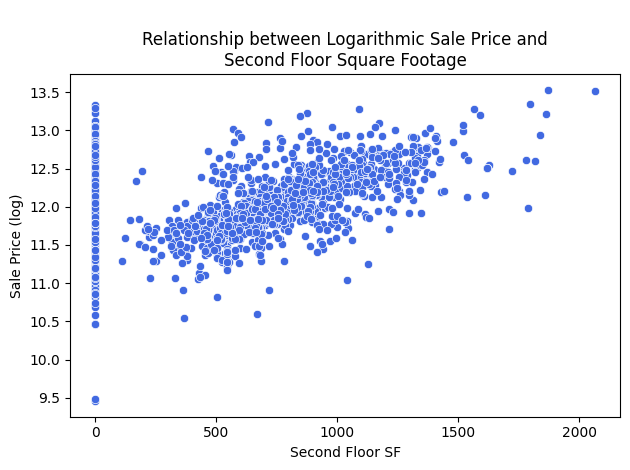

In [4]:
# developing a scatterplot
sns.scatterplot(x     = housing['Second_Flr_SF'],
                y     = housing['log_Sale_Price'], # unskewed Sale_Price
                color = 'royalblue')


# title and labels
plt.title(label   = """
Relationship between Logarithmic Sale Price and
Second Floor Square Footage""")
plt.xlabel(xlabel = 'Second Floor SF')
plt.ylabel(ylabel = 'Sale Price (log)')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

As can be observed, several observations have a second floor square footage of zero. Put simply, these properties do not have a second floor. This is something we can take advantage of with a binary trend-based feature, enabling us to analyze the effect second floors have on sale prices. Before engineering, let's analyze a few other x-features.

<strong>a)</strong> Complete the code below to develop a scatter plot between each x-feature and <em>log_Sale_Price</em>.
Reuse the code cell as many times as needed.

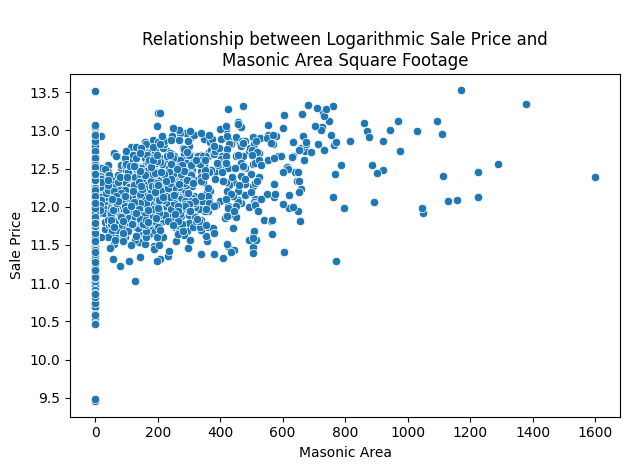

In [6]:
# developing a scatterplot
sns.scatterplot(data = housing,
                x= 'Mas_Vnr_Area',
                y = 'log_Sale_Price')


# title and labels
plt.title(label   = """
Relationship between Logarithmic Sale Price and
Masonic Area Square Footage""" )
plt.xlabel(xlabel = 'Masonic Area')
plt.ylabel(ylabel = 'Sale Price')


# cleaning up layout and rendering visual
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
From the scatter plots above, it is evident that several features have a high frequency of zero values. Let's explore further.
<br><br><br>
<strong>Basic Rule for Flag-Based Feature Engineering</strong>

* At least 100 observations must be on both sides of the flag (1s and 0s)

<br>
<strong>b)</strong> Use <em>len(&nbsp;)</em> and subsetting in the code below to analyze features that have a high frequency of zero values.

In [8]:
# counting the number of zeroes for
bsmt_zeroes   = len(housing['Total_Bsmt_SF'][housing['Total_Bsmt_SF'] == 0]) # Total_Bsmt_SF
sf_zeroes     = len(housing['Second_Flr_SF'][housing['Second_Flr_SF'] == 0]) # Second_Flr_SF
garage_zeroes = len(housing['Garage_Area'][housing['Garage_Area'] == 0]) # Garage_Area
mas_zeroes    = len(housing['Mas_Vnr_Area'][housing ['Mas_Vnr_Area'] == 0]) # Mas_Vnr_Area
porch_zeroes  = len(housing['Porch_Area'][housing['Porch_Area'] == 0]) # Porch_Area


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Basement       | {bsmt_zeroes}\t\t{len(housing) - bsmt_zeroes}
Second Floor   | {sf_zeroes}\t\t{len(housing) - sf_zeroes}
Garage         | {garage_zeroes}\t\t{len(housing) - garage_zeroes}
Masonic Veneer | {mas_zeroes}\t\t{len(housing) - mas_zeroes}
Porch          | {porch_zeroes}\t\t{len(housing) - porch_zeroes}
""")


                 No		Yes
               ---------------------
Basement       | 80		2850
Second Floor   | 1678		1252
Garage         | 158		2772
Masonic Veneer | 1771		1159
Porch          | 484		2446



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>c)</strong> Based on the results above, engineer binary trend-based features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.

In [10]:
# placeholder variables
housing['has_Second_Flr'] = 0
housing['has_Garage']     = 0
housing['has_Mas_Vnr']    = 0
housing['has_Porch']      = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in housing.iterrows():


    # Second_Flr_SF
    if housing.loc[index, 'Second_Flr_SF'] > 0:
        housing.loc[index, 'has_Second_Flr'] = 1


    # Garage_Area
    if housing.loc[index, 'Garage_Area'] > 0:
        housing.loc[index, 'has_Garage'] = 1


    # Mas_Vnr_Area
    if housing.loc[index, 'Mas_Vnr_Area'] > 0:
        housing.loc[index, 'has_Mas_Vnr'] = 1


    # Porch_Area
    if housing.loc[index, 'Porch_Area'] > 0:
        housing.loc[index, 'has_Porch'] = 1


## this code will not produce an output ##

<br>

In [11]:
# checking results
housing[  ['has_Second_Flr', 'has_Garage', 'has_Mas_Vnr', 'has_Porch']  ].head(n = 5)

,has_Second_Flr,has_Garage,has_Mas_Vnr,has_Porch
0,0,1,1,1
1,0,1,0,1
2,0,1,1,1
3,0,1,0,0
4,1,1,0,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

A new feature idea was discovered while exploring <em>Lot_Area</em> in an earlier script. Run the code below to engineer this feature into the housing dataset. Note that this feature is a <strong>ratio</strong> between a the area of property's buildings and its land.

In [12]:
my_model = smf.ols(formula = """ Sale_Price ~ Second_Flr_SF + has_Second_Flr"""",
                      data = housing)

results = my_model.fit()
print(results.summary())

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-3251561460.py, line 1)

In [13]:
## ratio between buildings and lot area ##

# summing building features
buildings = housing[["Gr_Liv_Area", "Garage_Area", "Porch_Area"]].sum(axis = 1)


# ratio between buildings and lot area
ratio_building_lot = (buildings / housing["Lot_Area"])


# augmenting new feature to housing dataset
housing["ratio_building_lot"] = ratio_building_lot


# checking results
housing["ratio_building_lot"].head(n = 5)

,ratio_building_lot
0,0.077306
1,0.162278
2,0.145090
3,0.235842
4,0.170427


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Let's check the correlations between the newly-engineered features with <em>Sale_Price</em> and <em>log_Sale_Price</em>.

In [14]:
# developing a small correlation matrix
new_corr = housing.corr(method = 'pearson').round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
new_corr.loc[ ['has_Second_Flr', 'has_Garage', 'has_Mas_Vnr',
               'has_Porch', 'ratio_building_lot'],
              ['Sale_Price', 'log_Sale_Price'] ].sort_values(by = 'Sale_Price',
                                                             ascending = False)

,Sale_Price,log_Sale_Price
has_Mas_Vnr,0.39,0.40
has_Porch,0.26,0.29
has_Garage,0.23,0.30
has_Second_Flr,0.09,0.10
ratio_building_lot,0.04,0.05


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part II: Feature Engineering with Interval and Count Data</h2><br>
Interval and count data for the Ames housing dataset can be found in <em>ames_non_continuous.xlsx</em>. Note that this file contains two sheets: <em>interval_count</em> and <em>categorical_discrete</em>. Remember, each <strong>classification</strong> of data (continuous, interval, etc.) comes with its own assumptions and philosophy of mathematics. This is the reason why they are analyzed separately. Organization is key to conducting a good analysis!
<br><br>
<strong>a)</strong> Complete the code below to import the <em>interval_count</em> sheet of <em>ames_non_continuous.xlsx</em>.

In [15]:
# importing interval and count data
file = './datasets/ames_non_continuous.xlsx'

housing_2 = pd.read_excel(io         = file,
                          header     = 0,
                          sheet_name = 'interval_count')


# documentation: help(pd.DataFrame.merge


# merging the two datasets
housing = housing.merge(right = housing_2,
                        on    = 'property_id',
                        how   = 'left')


# checking results
housing_2.head(n = 5)

,property_id,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars
0,1,6,5,1,0,1,7,2,2
1,2,5,6,1,0,1,5,0,1
2,3,6,6,1,1,1,6,0,1
3,4,7,5,2,1,1,8,2,2
4,5,5,5,2,1,1,6,1,2


<br>

In [16]:
# general info about the dataset
housing_2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   property_id    2930 non-null   int64
 1   Overall_Qual   2930 non-null   int64
 2   Overall_Cond   2930 non-null   int64
 3   Full_Bath      2930 non-null   int64
 4   Half_Bath      2930 non-null   int64
 5   Kitchen_AbvGr  2930 non-null   int64
 6   TotRms_AbvGr   2930 non-null   int64
 7   Fireplaces     2930 non-null   int64
 8   Garage_Cars    2930 non-null   int64
dtypes: int64(9)
memory usage: 206.1 KB


<br>

In [17]:
# descriptive statistics
housing_2.describe(include = 'number').round(decimals = 2)

,property_id,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars
count,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,6.09,5.56,1.57,0.38,1.04,6.44,0.60,1.77
std,845.96,1.41,1.11,0.55,0.50,0.21,1.57,0.65,0.76
min,1.00,1.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,733.25,5.00,5.00,1.00,0.00,1.00,5.00,0.00,1.00
50%,1465.50,6.00,5.00,2.00,0.00,1.00,6.00,1.00,2.00
75%,2197.75,7.00,6.00,2.00,1.00,1.00,7.00,1.00,2.00
max,2930.00,10.00,9.00,4.00,2.00,3.00,15.00,4.00,5.00


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Before moving forward, let's join the two housing datasets.

In [20]:
# documentation for the join method
help(housing.join)

Help on method join in module pandas.core.frame:

join(other: 'DataFrame | Series | Iterable[DataFrame | Series]', on: 'IndexLabel | None' = None, how: 'MergeHow' = 'left', lsuffix: 'str' = '', rsuffix: 'str' = '', sort: 'bool' = False, validate: 'JoinValidate | None' = None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Join columns of another DataFrame.

    Join columns with `other` DataFrame either on index or on a key
    column. Efficiently join multiple DataFrame objects by index at once by
    passing a list.

    Parameters
    ----------
    other : DataFrame, Series, or a list containing any combination of them
        Index should be similar to one of the columns in this one. If a
        Series is passed, its name attribute must be set, and that will be
        used as the column name in the resulting joined DataFrame.
    on : str, list of str, or array-like, optional
        Column or index level name(s) in the caller to join on the index
        in `

<br>

In [18]:
# setting property_id as index for both DataFrames
housing   = housing.set_index(keys = 'property_id')
housing_2 = housing_2.set_index(keys = 'property_id')


# left join to ensure retention of original data
housing = housing.join(other    = housing_2,
                       how      = 'left',
                       validate = 'one_to_one')


# checking results
housing.columns

ValueError: columns overlap but no suffix specified: Index(['Overall_Qual', 'Overall_Cond', 'Full_Bath', 'Half_Bath', 'Kitchen_AbvGr', 'TotRms_AbvGr', 'Fireplaces', 'Garage_Cars'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Scatter plots are not as useful when working with interval or count data. It is a better practice is to use box plots as this type of visual aggregates a distribution based on its quartiles. Also note that it is not a good practice to transform (logarithmic, etc.) interval or count data as interpretation becomes incredibly challenging. We will learn new techniques for these types of data.

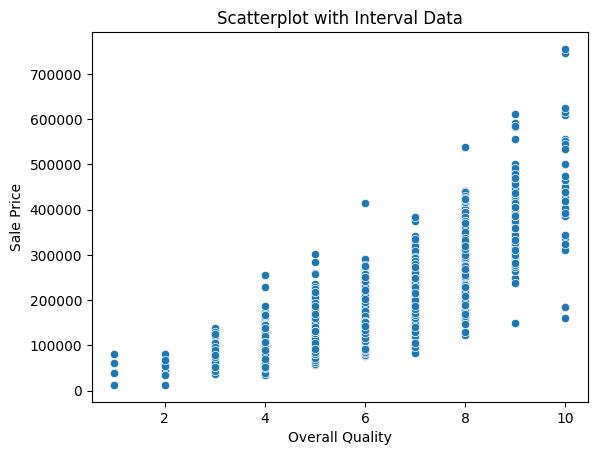

In [21]:
# scatterplot - orig ovr_qual and price
sns.scatterplot(x    = 'Overall_Qual',
                y    = 'Sale_Price' ,
                data = housing)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

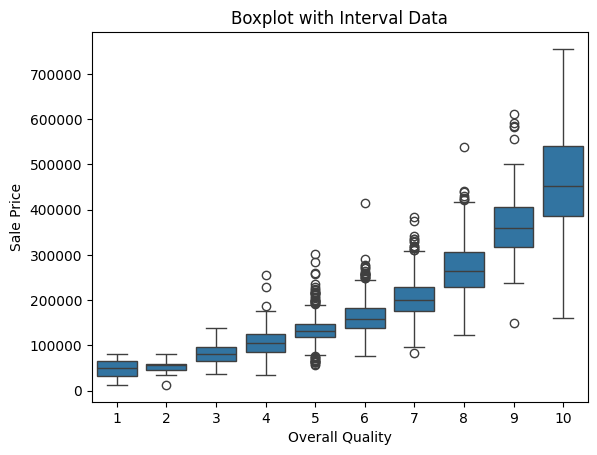

In [22]:
# boxplot - orig ovr_qual and price
sns.boxplot(x    = 'Overall_Qual',
            y    = 'Sale_Price',
            data = housing)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

<br>

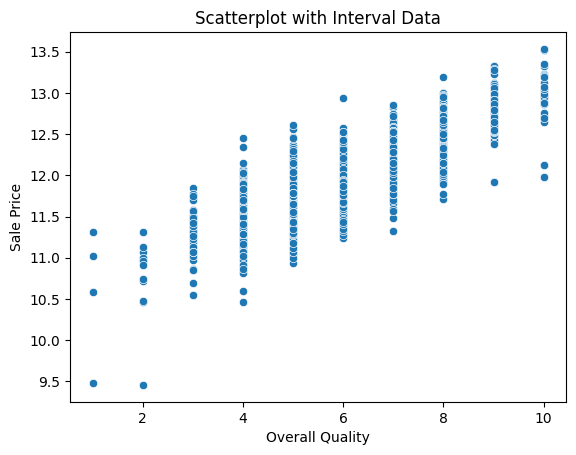

In [24]:
# scatterplot - orig ovr_qual and log price
sns.scatterplot(x    = 'Overall_Qual',
                y    = 'log_Sale_Price',
                data = housing)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

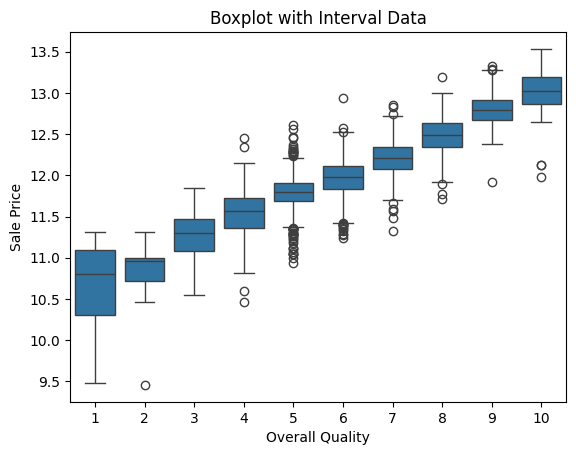

In [25]:
# boxplot - ori ovr_qual and log price
sns.boxplot(x    = 'Overall_Qual',
            y    = 'log_Sale_Price',
            data = housing)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

<br>

In [26]:
# correlations - ovr qual and prices
log_corr = housing.loc[ : , ['Overall_Qual',
                             'Sale_Price',
                             'log_Sale_Price']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


# checking results
log_corr.loc[ ['Overall_Qual'],
              ['Sale_Price', 'log_Sale_Price']   ]

,Sale_Price,log_Sale_Price
Overall_Qual,0.8,0.83


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
<strong>Tips to Analyzing Relationships with Boxplots</strong><br>

* Start by analyzing differences in the median lines for each boxplot. Does it appear that the median lines can be connected using a straight horizontal line? If not, move to the next bullet point.
* Engineer features as necessary. Make sure you have at least 100 observations in each part of your newly-engineered feature(s).

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Feature Engineering with Count Data</h2><br>
Let's take a look at the relationship between the number of bathrooms (full baths and half baths) and sale price.

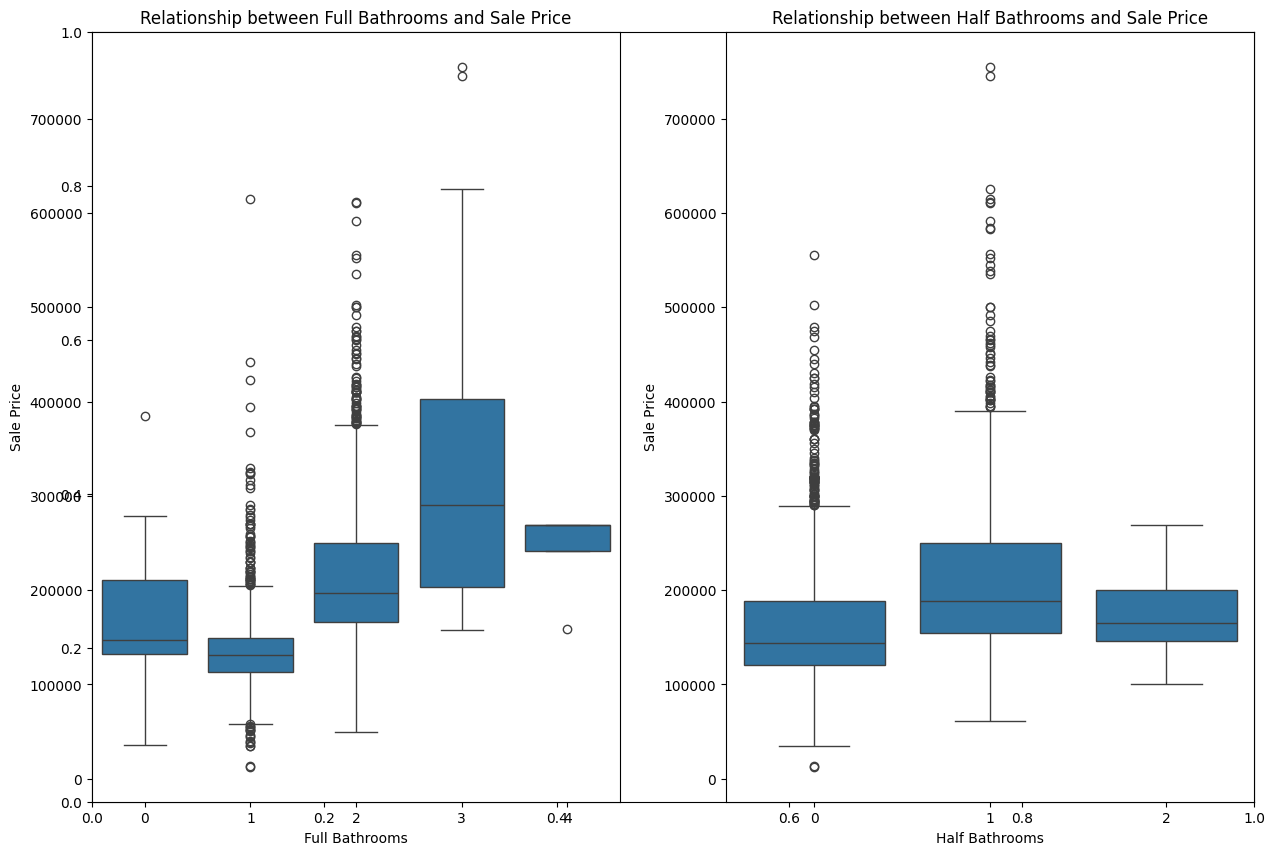


Count of Bathrooms

----------
Full Baths
----------
Full_Bath
0      12
1    1318
2    1532
3      64
4       4
Name: count, dtype: int64


----------
Half Baths
----------
Half_Bath
0    1843
1    1062
2      25
Name: count, dtype: int64





In [27]:
# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## full baths ##

# first plot window
plt.subplot(1, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'Full_Bath',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Relationship between Full Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Full Bathrooms')
plt.ylabel(ylabel = 'Sale Price')



## half baths ##

# second plot window
plt.subplot(1, 2, 2)

# developing a boxplot
sns.boxplot(x     = 'Half_Bath',
            y     = 'Sale_Price',
            data  = housing)


# titles and labels
plt.title(label   = 'Relationship between Half Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Half Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for full and half baths
print(f"""
Count of Bathrooms
==================

----------
Full Baths
----------
{housing['Full_Bath'].value_counts(normalize = False).sort_index()}


----------
Half Baths
----------
{housing['Half_Bath'].value_counts(normalize = False).sort_index()}


""")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Combining Features</strong><br>
Now, let's engineer a feature that represents total bathrooms using the following calculation:
<br><br>

~~~
Total_Baths = Full_Baths + (Half_Baths / 2)
~~~

<br>
<strong>a)</strong> Complete the code below to engineer Total_Baths based on the calculation above and check your results.

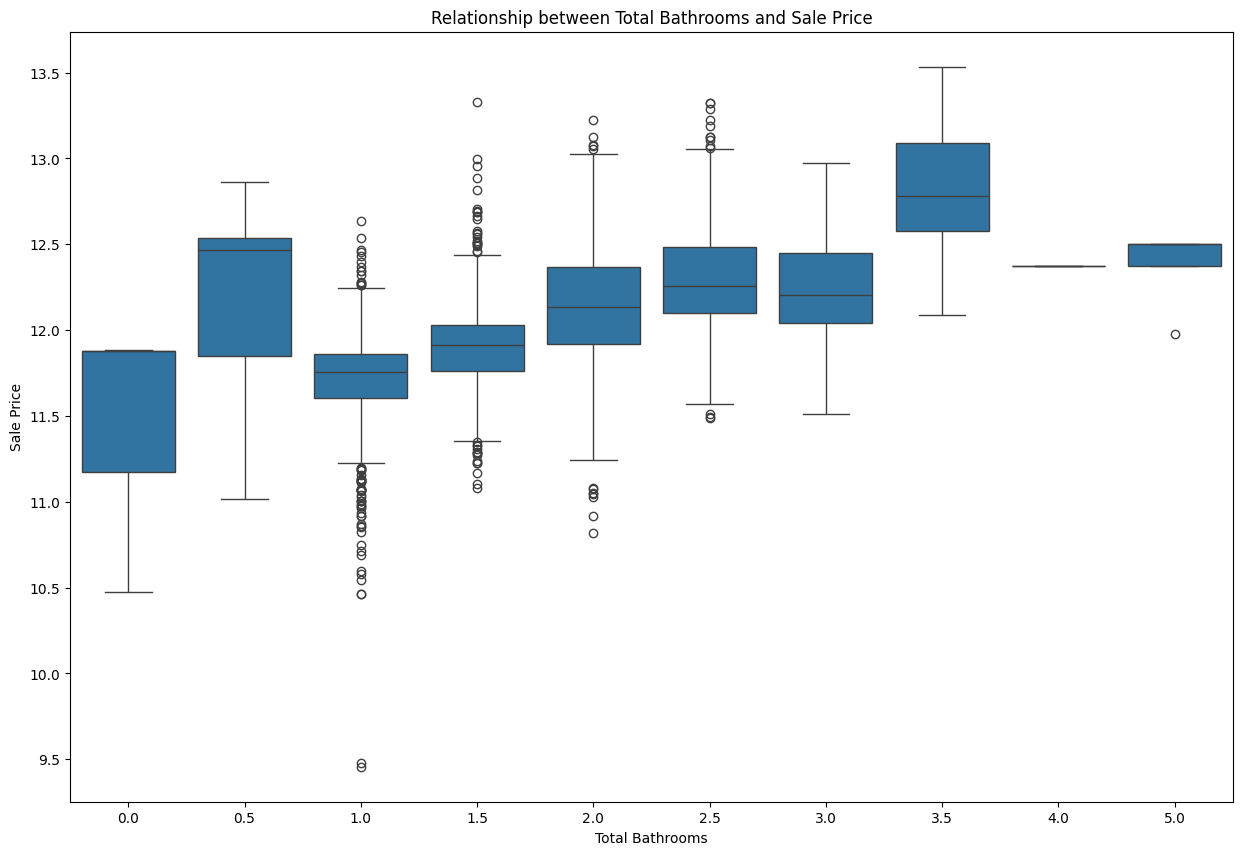


Bathrooms

-----------
Total Baths
-----------
Total_Bath
0.0      3
0.5      5
1.0    951
1.5    365
2.0    869
2.5    659
3.0     40
3.5     33
4.0      1
5.0      4
Name: count, dtype: int64


---------------------
Bathroom Correlations
---------------------
Full_Bath     0.55
Half_Bath     0.29
Total_Bath    0.58
Sale_Price    1.00
Name: Sale_Price, dtype: float64




In [32]:
# total bathrooms
housing['Total_Bath'] = housing ['Full_Bath'] + (housing['Half_Bath'] / 2)


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_Bath',
            y    = 'log_Sale_Price',
            data = housing)



# titles and labels
plt.title(label   = 'Relationship between Total Bathrooms and Sale Price')
plt.xlabel(xlabel = 'Total Bathrooms')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
bath_corr = housing.loc[ : , ['Full_Bath',
                              'Half_Bath',
                              'Total_Bath',
                              'Sale_Price']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Bathrooms
=========

-----------
Total Baths
-----------
{housing['Total_Bath'].value_counts(normalize = False).sort_index()}


---------------------
Bathroom Correlations
---------------------
{bath_corr['Sale_Price']}

""")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Feature Engineering with Categorical Data</h2><br>
Categorical features need to be converted into a series of yes or no questions, more formally known as <strong>binary matrix factorization</strong>. One category needs to be removed to avoid issues with autocorrelation (the <em>k-1</em> rule).

In [ ]:
# importing interval and count data
file = './datasets/ames_non_continuous.xlsx'

housing_2 = pd.read_excel(io         = file,
                          header     = 0,
                          sheet_name = 'categorical_discrete')


# documentation: help(pd.DataFrame.merge)

# merging the two datasets
housing = housing.merge(right = housing_2,
                        on    = 'property_id',
                        how   = 'left')


# checking results
housing.head(n = 5)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Run the following code to see the value counts for each categorical feature.

In [ ]:
# printing columns
print(f"""
Street
------
{housing['Street'].value_counts()}


Lot Config
----------
{housing['Lot_Config'].value_counts()}


Neighborhood
-------------
{housing['Neighborhood'].value_counts()}
""")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>The user-defined function below will generate boxplots for categorical data.</h4>

In [ ]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))

    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)

    plt.suptitle("")
    plt.show()

<br>

In [ ]:
# calling the function for Street
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Street',
					 data     = housing)


# calling the function for Lot_Config
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Lot_Config',
					 data     = housing)


# calling the function for Neighborhood
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Neighborhood',
					 data     = housing)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>a)</strong> Fill in the blanks below to one hot encode each categorical feature using <em>get_dummies(&nbsp;)</em>. Then, remove the original categorical features using <em>drop(&nbsp;)</em>. Finally, merge the one hot encoded data with the original dataset using <em>join(&nbsp;)</em>. Note that running the following code more than once will generate an error because it is dropping the original categorical features.

In [ ]:
# one hot encoding categorical variables
one_hot_Lot          = pd._____(housing['Lot_Config'])
one_hot_Neighborhood = pd._____(housing['Neighborhood'])


# dropping categorical variables after they've been encoded
housing = housing._____(columns = ['Street', 'Lot_Config', 'Neighborhood'],
                        axis = 1,
                        dtype = int)


# joining codings together
housing = housing.join([one_hot_Lot, one_hot_Neighborhood])


# saving new columns
new_columns = housing.columns

<br>

In [ ]:
# checking results
housing.head(n = 5)

<br>

In [ ]:
## this will convert Lot_Config into CulDSac Y/N ##

# dropping categories that will not be used
housing = housing.drop( ["Corner", "FR2", "FR3", "Inside"], axis = 1)

<br>

In [ ]:
# combining smaller sample sizes into "Other" group
housing["Other_NH"] = housing.loc[ : ,  ["IDOTRR", "Timber", "NoRidge", "StoneBr",
                                         "SWISU", "ClearCr", "MeadowV", "BrDale",
                                         "Blmngtn", "Veenker", "NPkVill", "Blueste",
                                         "Greens", "GrnHill", "Landmrk"]  ].sum(axis = 1)


housing = housing.drop(["IDOTRR", "Timber", "NoRidge", "StoneBr",
                        "SWISU", "ClearCr", "MeadowV", "BrDale",
                        "Blmngtn", "Veenker", "NPkVill", "Blueste",
                        "Greens", "GrnHill", "Landmrk"], axis = 1)


# checking results
housing["Other_NH"].value_counts(normalize = True).round(decimals = 2)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part V: Building Predictive Models</h2>
<br>
What we're about to do is considered data dumping. <font color="red">You will lose points on your assignments for doing something like this.</font>

In [ ]:
# instantiating a correlation matrix
df_corr = housing.corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

It will be more efficient to simply analyze the Pearson correlations with the Y-variable(s), as in the code below.

In [ ]:
# creating a (Pearson) correlation matrix
df_corr = housing.corr().round(2)


# printing (Pearson) correlations with SalePrice
df_corr.loc[ : , ['Sale_Price', 'log_Sale_Price'] ].sort_values(by = 'Sale_Price',
                                                                ascending = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<strong>b)</strong> Sale_Price or log_Sale_Price?
<br>    
Write a code that:

 * takes the results of the correlation output above
 * determines the higher correlation (<em>Sale_Price</em> or <em>log_Sale_Price</em>)
 * outputs the results as a frequency table

In [ ]:
# write your code here





<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>c) Develop two linear models, one using the original sale price and the other using its logarithmic counterpart.</strong>

In [ ]:
# preparing x-data
x_all = housing.drop([ 'Sale_Price', 'log_Sale_Price' ], axis = 1)


# preparing y-data
original_y = housing[ 'Sale_Price' ]
log_y      = housing[ 'log_Sale_Price' ]

<br>

In [ ]:
# checking documentation
help(quick_lm)

<br>

In [ ]:
## stepwise model using Sale_Price ##
sp_model = quick_lm(x_data        = _____,
                    y_data        = _____,
                    threshold_in  = 0.01,
                    threshold_out = 0.05,
                    test_size     = 0.25)

<br>

In [ ]:
# analyzing model summary
sp_model[_____]._____()

<br>

In [ ]:
## stepwise model using log_Sale_Price ##
log_sp_model = quick_lm(x_data        = _____,
                        y_data        = _____,
                        threshold_in  = 0.01,
                        threshold_out = 0.05,
                        test_size     = 0.25)

<br>

In [ ]:
# analyzing model summary
log_sp_model[_____]._____()

<br><br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~
 ___  ___      ___       __   ___    
|__  |__   /\   |  |  | |__) |__  __
|    |___ /~~\  |  \__/ |  \ |___    
                                     
 __   __     ___  ___    __          
|__) |__) | |__  |__  | /  `         
|  \ |  \ | |    |    | \__,         
                                                                    
~~~

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<br>